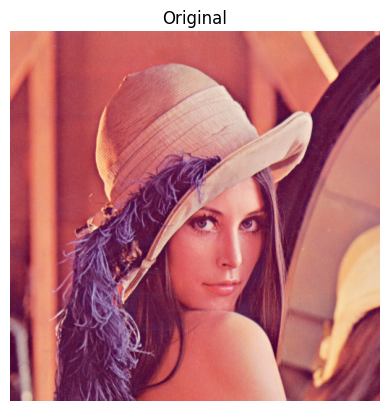

In [3]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('lenna.png')

# RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Original")
plt.show()

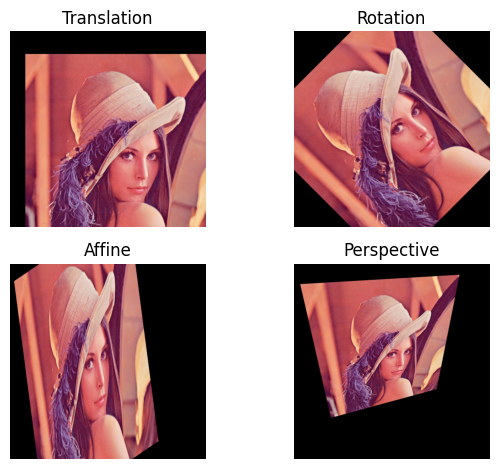

In [4]:
# Translation 변환(x축 40, y축 60 이동)
height, width = img_rgb.shape[:2]
translation_matrix = np.float32([[1, 0, 40], [0, 1, 60]])
translated_img = cv2.warpAffine(img, translation_matrix, (width, height))

# Rotation 변환(45도 회전)
center = (width / 2, height / 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle=45, scale=1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))

# Affine 변환(세 점을 이용한 변환)
pts1 = np.float32([[20, 50], [300, 100], [100, 200]])
pts2 = np.float32([[30, 100], [200, 50], [100, 250]])
affine_matrix = cv2.getAffineTransform(pts1, pts2)
affined_img = cv2.warpAffine(img, affine_matrix, (width, height))

# Perspective 변환(네 점을 이용한 변환)
pts1 = np.float32([[50, 70], [350, 50], [30, 350], [350, 400]])
pts2 = np.float32([[80, 120], [320, 80], [100, 320], [300, 300]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspectived_img = cv2.warpPerspective(img, perspective_matrix, (width, height))

# 결과 시각화
images = [translated_img, rotated_img, affined_img, perspectived_img]
titles = ['Translation', 'Rotation', 'Affine', 'Perspective']

for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

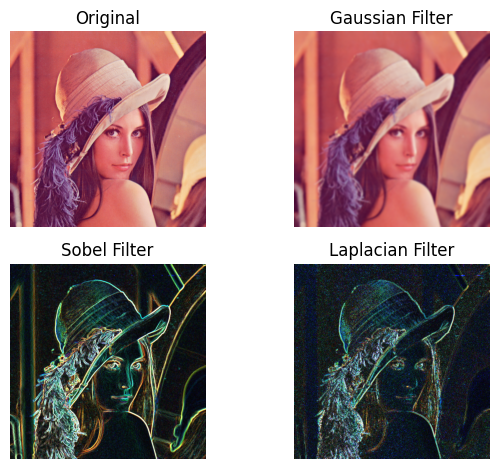

In [5]:
# 1. Guassian Filter 적용
gaussian_img = cv2.GaussianBlur(img_rgb, (11, 11), sigmaX=2.0)

# 2. Sobel Filter 적용
sobel_x = cv2.Sobel(img_rgb, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_rgb, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel_img = cv2.convertScaleAbs(sobel)

# 3. Laplacian Filter 적용
laplacian = cv2.Laplacian(img_rgb, cv2.CV_64F, ksize=3)
laplacian_img = cv2.convertScaleAbs(laplacian)

# 결과 시각화
titles = ['Original', 'Gaussian Filter', 'Sobel Filter', 'Laplacian Filter']
images = [img_rgb, gaussian_img, sobel_img, laplacian_img]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

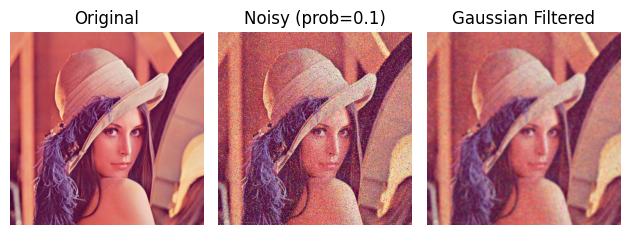

In [6]:
# Salt & Pepper Noise 함수 정의
def add_salt_pepper_noise(image, prob):
    output = np.copy(img_rgb)
    noise = np.random.rand(*img_rgb.shape)

    # Salt (white) noise
    output[noise < (prob / 2)] = 255

    # Pepper (black) noise
    output[noise > 1 - (prob / 2)] = 0

    return output

# Gaussian Filter 함수 정의
def apply_gaussian_filter(image, ksize=(11, 11), sigma=2.0):
    return cv2.GaussianBlur(image, ksize, sigmaX=sigma)

# 노이즈 추가 및 필터 적용
prob = 0.1
noisy_img = add_salt_pepper_noise(img_rgb, prob)
denoised_img = apply_gaussian_filter(noisy_img)

# 결과 시각화
titles = ['Original', f'Noisy (prob={prob})', 'Gaussian Filtered']
images = [img_rgb, noisy_img, denoised_img]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

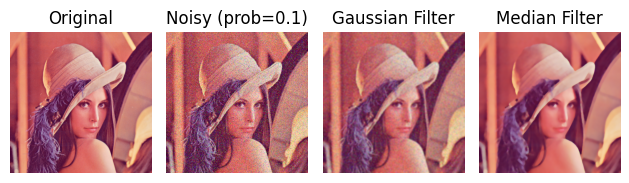

In [7]:
# Salt & Pepper Noise 함수 정의
def add_salt_pepper_noise(image, prob):
    output = np.copy(img_rgb)
    noise = np.random.rand(*img_rgb.shape)

    # Salt (white) noise
    output[noise < (prob / 2)] = 255

    # Pepper (black) noise
    output[noise > 1 - (prob / 2)] = 0

    return output

# 노이즈 추가 및 필터 적용
prob = 0.1
noisy_img = add_salt_pepper_noise(img_rgb, prob)

# Gaussian Filter 적용
gaussian_filtered = cv2.GaussianBlur(noisy_img, (9, 9), sigmaX=2.0)

# Median Filter 적용
median_filtered = cv2.medianBlur(noisy_img, 9)

# 결과 시각화
titles = ['Original', f'Noisy (prob={prob})', 'Gaussian Filter', 'Median Filter']
images = [img_rgb, noisy_img, gaussian_filtered, median_filtered]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

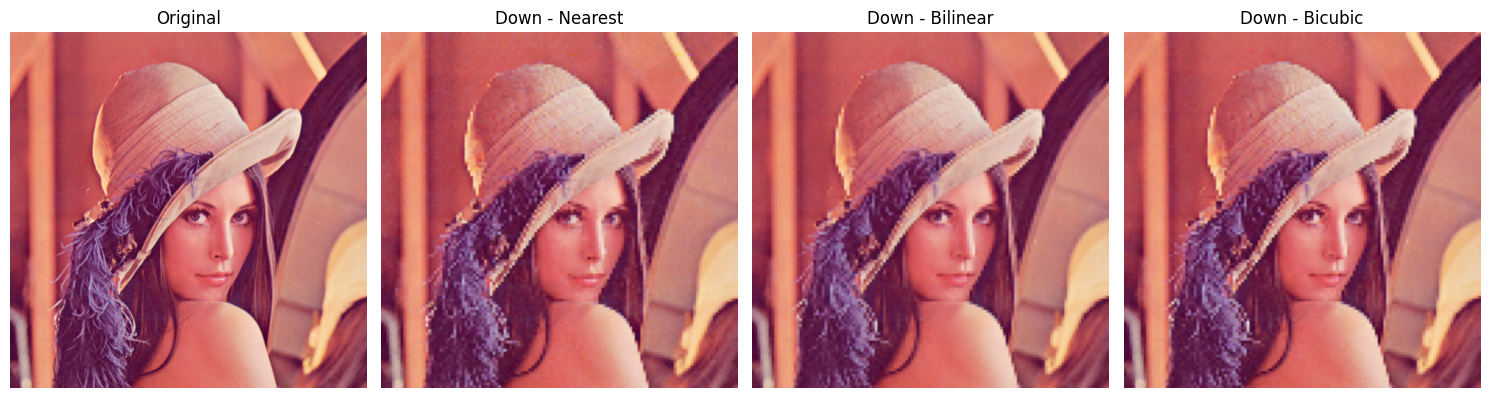

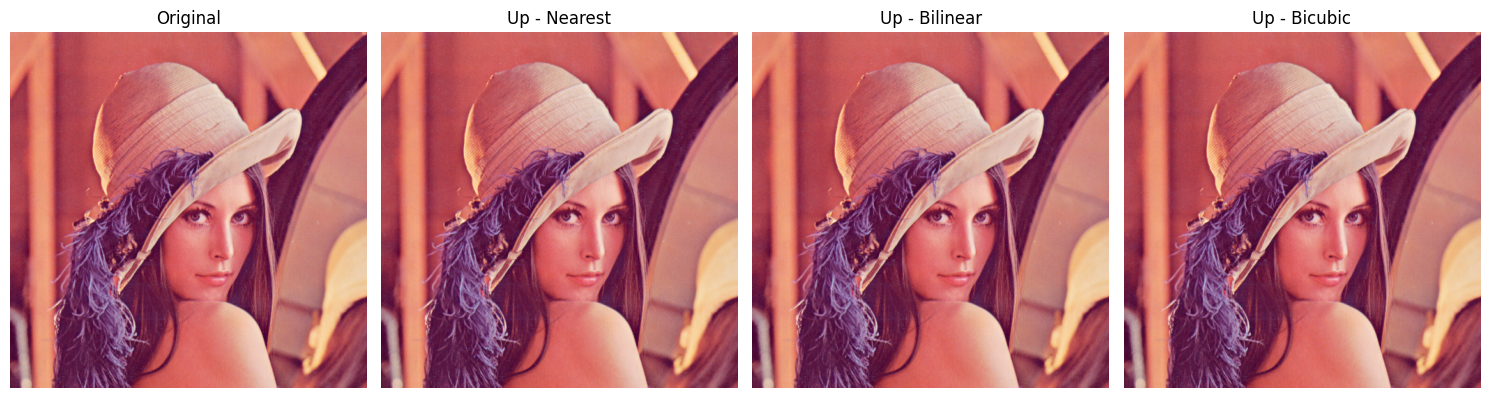

In [8]:
# 다운샘플링 / 업샘플링 크기 설정
down_size = (128, 128)
up_size = (512, 512)

# Interpolation별 Down-sampling
down_nearest = cv2.resize(img, down_size, interpolation=cv2.INTER_NEAREST)
down_linear  = cv2.resize(img, down_size, interpolation=cv2.INTER_LINEAR)
down_cubic   = cv2.resize(img, down_size, interpolation=cv2.INTER_CUBIC)

# Interpolation별 Up-sampling
up_nearest = cv2.resize(img, up_size, interpolation=cv2.INTER_NEAREST)
up_linear  = cv2.resize(img, up_size, interpolation=cv2.INTER_LINEAR)
up_cubic   = cv2.resize(img, up_size, interpolation=cv2.INTER_CUBIC)

# Down-sampling 결과 시각화
images = [img, down_nearest, down_linear, down_cubic]
titles = ['Original', 'Down - Nearest', 'Down - Bilinear', 'Down - Bicubic']

plt.figure(figsize=(15, 8))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Up-sampling 결과 시각화
images = [img, up_nearest, up_linear, up_cubic]
titles = ['Original', 'Up - Nearest', 'Up - Bilinear', 'Up - Bicubic']

plt.figure(figsize=(15, 8))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

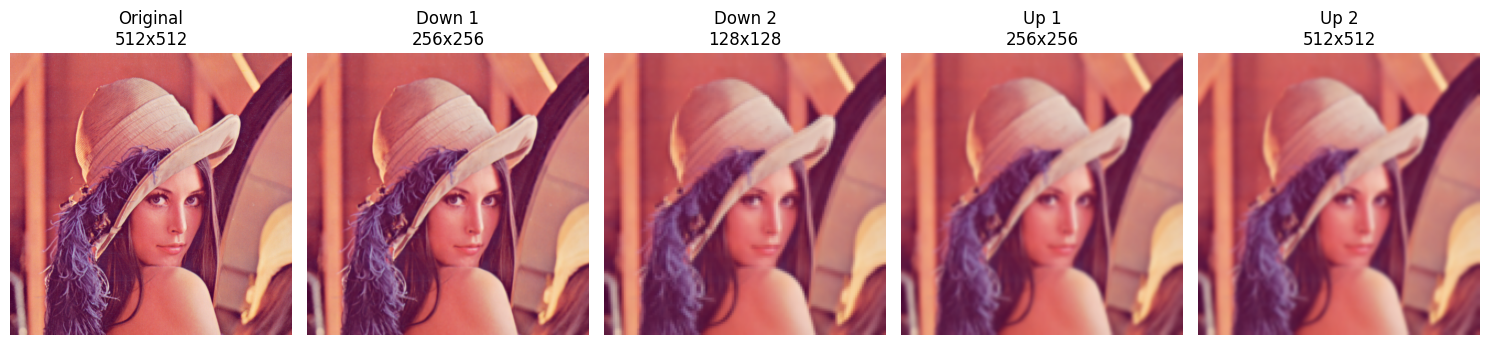

In [9]:
# 피라미드 단계 생성
down1 = cv2.pyrDown(img_rgb)
down2 = cv2.pyrDown(down1)

up1 = cv2.pyrUp(down2)
up2 = cv2.pyrUp(up1)

# 이미지 목록 및 제목
images = [img_rgb, down1, down2, up1, up2]
titles = [
    'Original',
    'Down 1',
    'Down 2',
    'Up 1',
    'Up 2'
]

# 결과 시각화
plt.figure(figsize=(15, 6))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"{title}\n{image.shape[1]}x{image.shape[0]}")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

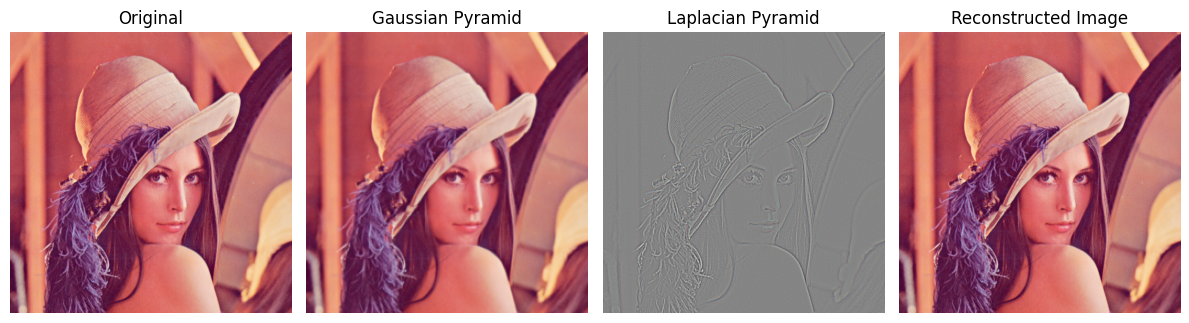

이미지 크기 분석
Original: 512 x 512
Gaussian Pyramid: 256 x 256
Laplacian Pyramid: 512 x 512
Reconstructed Image: 512 x 512


In [12]:
# Gaussian Pyramid 생성
gauss = cv2.pyrDown(img_rgb)  # 1/2 크기

# Laplacian Pyramid 생성
gauss_up = cv2.pyrUp(gauss)
gauss_up = cv2.resize(gauss_up, (img_rgb.shape[1], img_rgb.shape[0]))
laplacian = cv2.subtract(np.float32(img_rgb), np.float32(gauss_up))  # float 상태 유지

laplacian_display = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)
laplacian_display = np.uint8(laplacian_display)

# 복원(Reconstruction)
reconstructed = cv2.add(np.float32(gauss_up), laplacian)  # float끼리 합
reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)  # 정수화


# 결과 시각화
titles = ['Original', 'Gaussian Pyramid', 'Laplacian Pyramid', 'Reconstructed Image']
images = [img_rgb, gauss, laplacian_display, reconstructed]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cv2.convertScaleAbs(images[i]))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# 크기 분석
print("이미지 크기 분석")
for title, image in zip(titles, images):
  print(f"{title}: {image.shape[1]} x {image.shape[0]}")

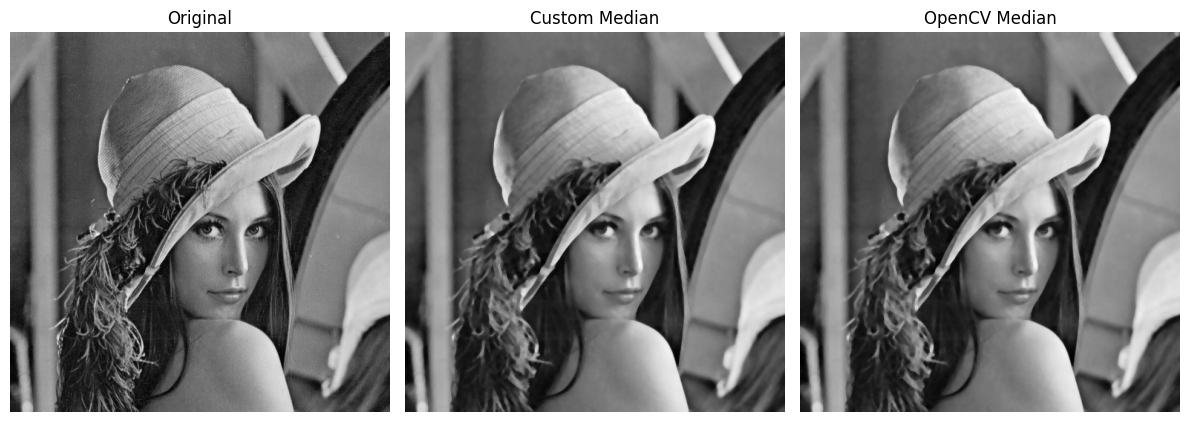

In [18]:
# 이미지 그레이스케일로 변환
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Median Blur 직접 구현
def median_blur_custom(image, ksize=5):
    assert ksize % 2 == 1, "ksize must be odd"

    pad = ksize // 2
    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='edge')

    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+ksize, j:j+ksize]
            median = np.median(window)
            output[i, j] = median

    return output

# 직접 구현한 Median Filter
custom_median = median_blur_custom(gray, ksize=5)

# OpenCV 결과
opencv_median = cv2.medianBlur(gray, 5)

# 결과 시각화
titles = ['Original', 'Custom Median', 'OpenCV Median']
images = [gray, custom_median, opencv_median]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()